In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv("books.csv", error_bad_lines = False)

### ignore the erros in the bad lines

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [11]:
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


TypeError: get_x() takes 1 positional argument but 3 were given

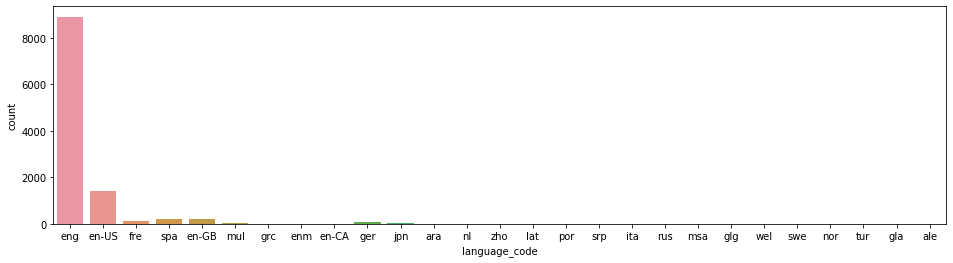

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure (figsize=(16,4))
ax = sns.countplot(x = df.language_code, data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x(-0.05,p.get_height()+100)))

In [17]:
df = df.loc[df['language_code'].isin(['eng','en-US','en-GB','en-CA'])].reset_index()

In [18]:
df

,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10532,11117,45630,Whores for Gloria,William T. Vollmann,3.69,0140231579,9780140231571,en-US,160,932,111,2/1/1994,Penguin Books
10533,11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
10534,11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
10535,11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books


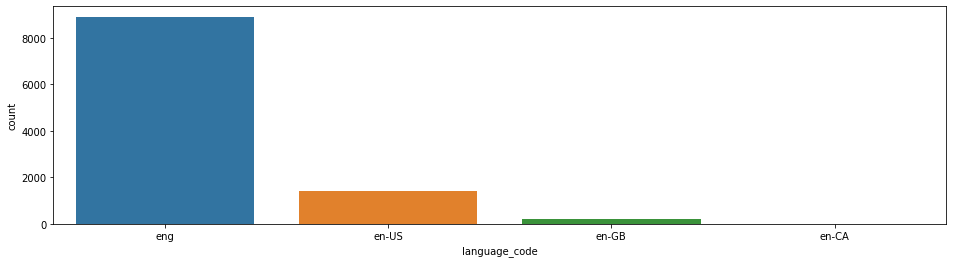

In [19]:
plt.figure (figsize=(16,4))
ax = sns.countplot(x = df.language_code, data = df)

In [29]:
![alt text] (IMDB.png "IMDB Calculation")

'[alt' is not recognized as an internal or external command,
operable program or batch file.


In [43]:
def popularityRecommender(df):
    minimum_ratings_counts = 0.75*df['ratings_count'].max()
    mean_rating = df['average_rating'].mean()
    df['weighted_rating'] = (((df['ratings_count']/(df['ratings_count']+minimum_ratings_counts))*df['average_rating']) +
                            ((minimum_ratings_counts/(df['ratings_count']+minimum_ratings_counts))*mean_rating))
    recommendations = df.sort_values(by = 'weighted_rating', ascending = False).head(5)
    return (recommendations)

In [44]:
top5 = popularityRecommender(df)
top5.head(5)

,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,weighted_rating
3,3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,4.185444
0,0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,4.172746
1,1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,4.146071
4169,4415,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,0439064864,9780439064866,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.,4.126539
23,23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,0618346252,9780618346257,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt,4.094953


In [46]:
top5Names = top5["title"].head(5).values
print(top5Names)

['Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)'
 'Harry Potter and the Half-Blood Prince (Harry Potter  #6)'
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)'
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)'
 'The Fellowship of the Ring (The Lord of the Rings  #1)']


In [47]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer


In [49]:
cbr = TfidfVectorizer(stop_words = 'english')
tfidf_matrix = cbr.fit_transform(df["title"])
distance_matrix = linear_kernel(tfidf_matrix)
indices = pd.Series (df.index, index = df['title']).drop_duplicates()

In [50]:
distance_matrix

array([[1.        , 0.726823  , 0.73012001, ..., 0.        , 0.        ,
        0.        ],
       [0.726823  , 1.        , 0.74404341, ..., 0.        , 0.        ,
        0.        ],
       [0.73012001, 0.74404341, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [53]:
def ContentBasedRecommender(title, indices, distance_matrix):
    id_ = indices[title]
    distances = list(enumerate(distance_matrix[id_]))
    distances = sorted(distances, key = lambda x: x[1], reverse = True)
    distances = distances [1:6]
    recommendations = [distance[0] for distance in distances]
    return df['title'].iloc[recommendations]

In [54]:
ContentBasedRecommender ("Poor People", indices, distance_matrix)

7292                  The Book of Other People
2872    The Working Poor: Invisible in America
3265                            All New People
9017                       A Man of the People
212              We Were Not Like Other People
Name: title, dtype: object

In [55]:
ContentBasedRecommender ("Expelled from Eden: A William T. Vollmann Reader", indices, distance_matrix)

2315                 This Other Eden
7089                            Eden
2325    Who Was William Shakespeare?
5268                    West To Eden
1203                    East of Eden
Name: title, dtype: object

In [56]:
from sklearn.metrics.pairwise import cosine_similarity


In [57]:
cbr = TfidfVectorizer(stop_words = 'english')
tfidf_matrix = cbr.fit_transform(df["authors"])
distance_matrix = cosine_similarity(tfidf_matrix)
df = df.drop_duplicates (subset = "authors")
indices = pd.Series (df.index, index = df['authors']).drop_duplicates(keep = "first", inplace = False)

In [58]:
indices

authors
J.K. Rowling/Mary GrandPré                                    0
J.K. Rowling                                                  2
W. Frederick Zimmerman                                        5
Douglas Adams                                                 7
Douglas Adams/Stephen Fry                                    10
                                                          ...  
Sam R. Watkins                                            10527
Alexander Hunter                                          10528
David Wood/Roald Dahl                                     10529
Dave Crane/Eric Pascarello/Darren James                   10531
William T. Vollmann/Larry McCaffery/Michael Hemmingson    10533
Length: 6359, dtype: int64

In [61]:
def ContentBasedAuthorRecommender(author, indices, distance_matrix):
    id_ = indices[author]
    distances = list(enumerate(distance_matrix[id_]))
    distances = sorted(distances, key = lambda x: x[1], reverse = True)
    distances = distances [1:6]
    recommendations = [distance[0] for distance in distances]
    return df['authors'].iloc[recommendations]

In [62]:
ContentBasedAuthorRecommender('J.R.R. Tolkien', indices, distance_matrix)

40      Edward P. Jones/Kevin R. Free
42                       Satyajit Das
936                Colleen McCullough
2358                       Andre Duza
2360         Kate Bornstein/Sara Quin
Name: authors, dtype: object